# Desain Filter dengan Jendela

Kita mulai dengan filter ideal (sinc), yang panjangnya tak terbatas. Untuk membuatnya kausal dan mendapatkan kompromi yang diinginkan antara lebar pita transisi dan redaman stopband, kita mengalikannya dengan jendela berpanjang terbatas. Jendela ini bisa didapatkan melalui optimisasi, atau dipilih dari salah satu yang "pra-dibuat". Filter yang lebih panjang juga menghasilkan lebar pita transisi yang lebih sempit.

Respons frekuensi yang dihasilkan setelah mengalikan respon impuls ideal (sinc) dengan fungsi jendela adalah konvolusi dari respons frekuensi ideal dan respons frekuensi jendela. Lebar pita lulus yang dihasilkan adalah lebar pita lulus ideal ditambah dengan lebar pita lulus jendela. Stopband yang dihasilkan dimulai pada frekuensi stopband dari respons frekuensi ideal (frekuensi cutoff) ditambah dengan frekuensi awal stopband dari fungsi jendela (menambahkan lebar pita transisi).

Untuk mendapatkan lebar pita lulus atau stopband tertentu, hal ini harus diperhitungkan, dan frekuensi cutoff harus dimodifikasi sesuai.

## Contoh

Kami melihat bahwa Jendela Kaiser setidaknya memenuhi persyaratan untuk redaman dari contoh aplikasi downsampling kami. Bagaimana kita mendapatkan awal yang benar dari stopband (untuk meredam aliasing untuk downsampling dengan cukup) menggunakan metode desain filter kami?

Stopband kita seharusnya dimulai pada 0,5 untuk faktor downsampling N=2. Melihat jendela Kaiser dengan β=8, kita melihat bahwa kita mendapatkan -60 dB pada frekuensi terstandarisasi sekitar 0,36. Oleh karena itu, filter ideal kita perlu memiliki akhir dari pita lulusnya di $0,5-0,36=0,14$ (ingat di sini 1 adalah frekuensi Nyquist), maka $ω_s=ω_c=0,14π$.

Perhatikan: di sini kami membutuhkan perkalian dengan pi karena bagi formula kami pi adalah frekuensi Nyquist. Sekarang kita hanya perlu menyisipkan ini ke dalam rumus kita untuk filter ideal (fungsi sinc), dengan $L=16$.

$$h(n) = \frac{sin(\omega_c(n-7.5))}{\omega_c (n-7.5)}$$

untuk $n=0,...,15,$

atau, dengan normalisasi yang berbeda untuk membiarkan pita lulus dimulai pada 0 dB

$$h(n) = \frac{sin(\omega_c(n-7.5))}{\pi (n-7.5)}$$

(dengan $\omega_c=0,14π$ dan mengalikannya dengan jendela Kaiser kita.

Di iPython:

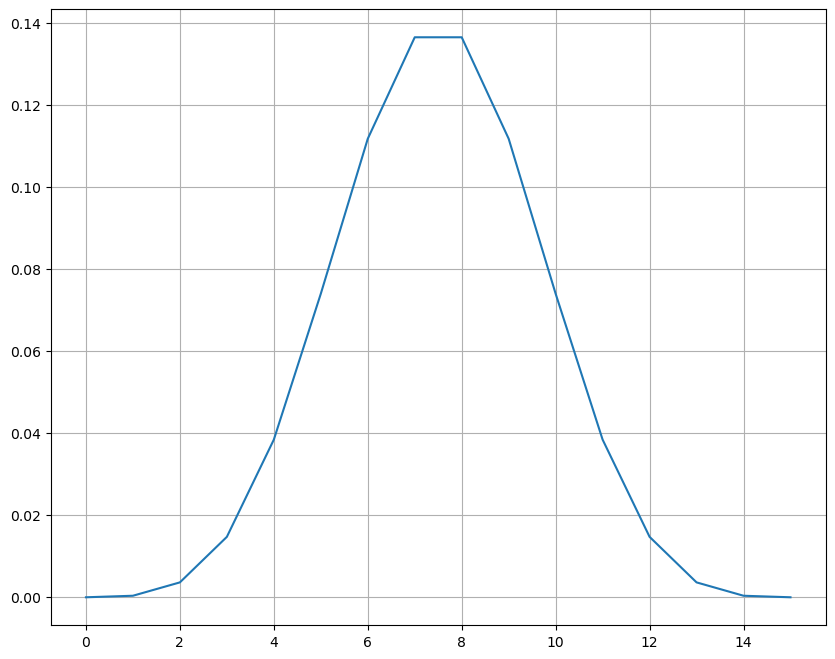

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n=np.arange(16);
h=np.sin(0.14*np.pi*(n-7.5))/(np.pi*(n-7.5));
hk=np.kaiser(16,8);
hfilt=hk*h

plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Respons frekuensinya:

In [2]:
import scipy.signal as signal

def freqz(x):
    # get frequency bins and according magnitude values 
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi 

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,np.pi,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,np.pi,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

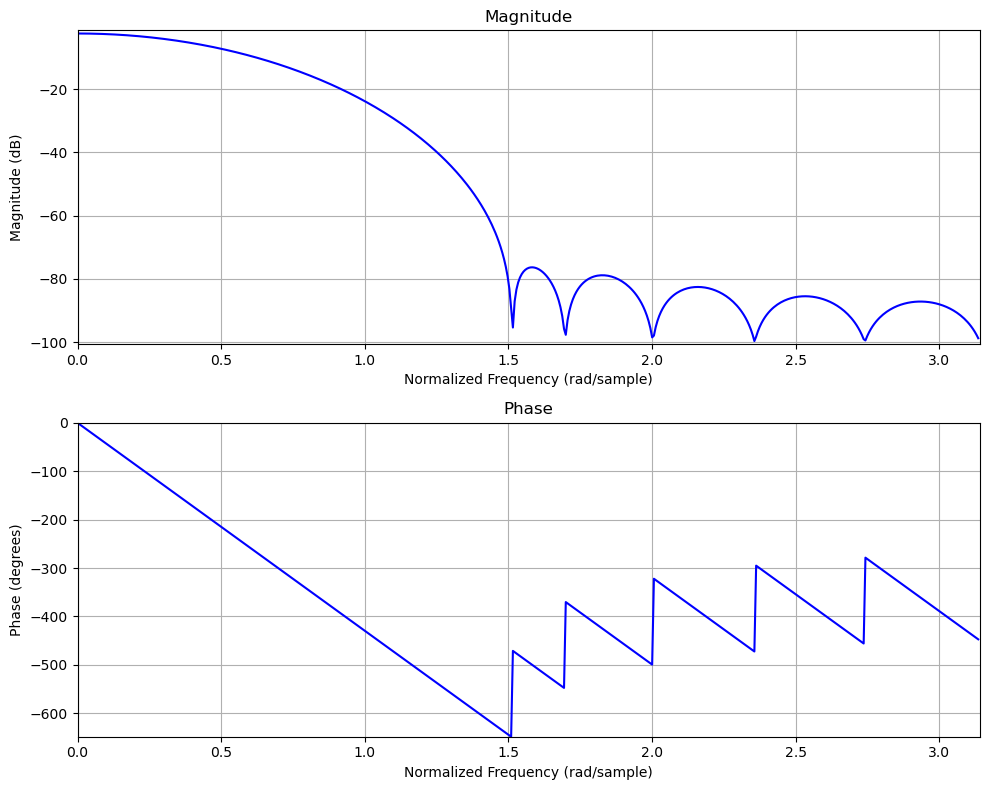

In [3]:
freqz(hfilt)

Di sini kita melihat bahwa pada frekuensi terstandarisasi 0,5 memang memiliki redaman yang cukup, sekitar -80 dB! Tetapi pita lulus (hingga sekitar -6 dB) hanya sampai frekuensi terstandarisasi sekitar 0,15, yang biasanya tidak cukup! Kami tidak benar-benar menentukannya, tetapi untuk tujuan praktis ini biasanya tidak akan berhasil.

Jadi bagaimana kita bisa meningkatkan pita lulus sekarang? Karena kita sudah mencoba kompromi yang berbeda untuk lebar pita transisi dan redaman stopband, kita sekarang bisa mencoba meningkatkan panjang filter. Cobalah L=32 (daripada 16). Berikut adalah jendela Kaiser untuk β=8 dengan panjang L=32:

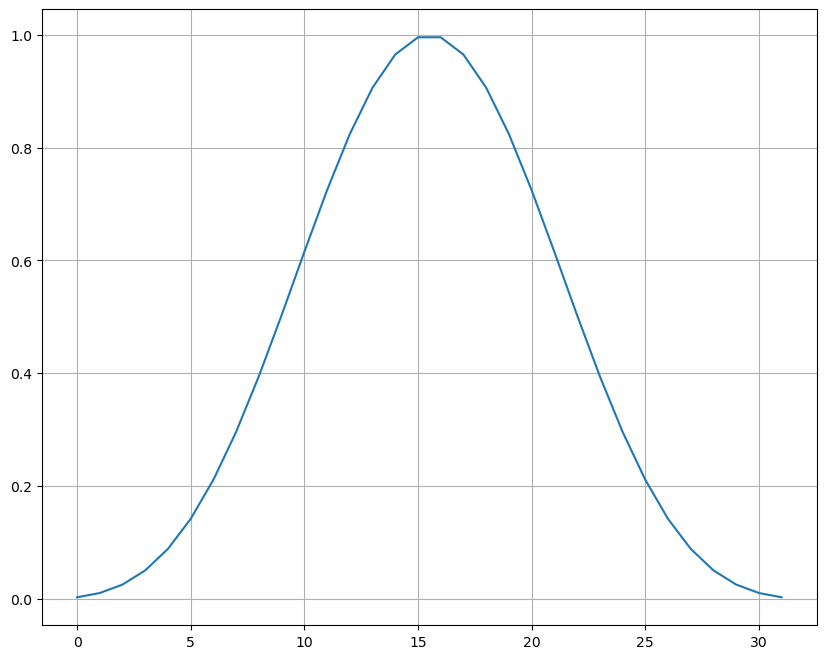

In [4]:
hk=np.kaiser(32,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Respons frekuensinya adalah:

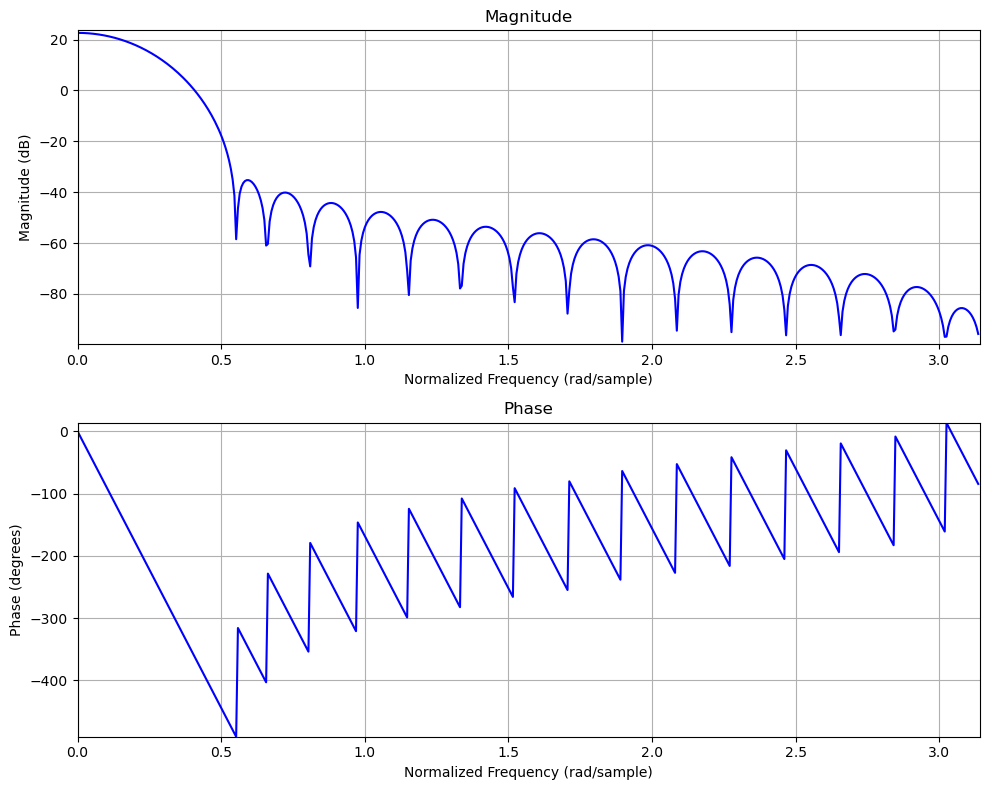

In [5]:
freqz(hk)

Perhatikan: Jendela Kaiser akan menjadi filter akhir kami, jika respon impuls ideal kami terdiri dari urutan tak terbatas satu. Hal ini terjadi jika filter ideal kami hanya berupa delta pulse pada frekuensi nol, sehingga merupakan filter low pass yang sangat kecil.

Perhatikan bahwa lobe utama dari jendela panjang 32 ini (hingga sekitar 0,17) sekitar separuh lebarnya dibandingkan dengan lobe utama pada panjang 16! Dengan cara ini, kita mengurangi lebar transisi dari filter yang dihasilkan kita. Di sini kita bisa mengatakan bahwa pita lulus kita berakhir pada frekuensi terstandarisasi 0,17. Oleh karena itu, kita perlu memiliki filter ideal kita dengan stopband yang dimulai pada 0,5-0,17=0,33, menghasilkan rumus untuk respon impuls ideal (seperti di atas untuk filter panjang 16), dengan $\omega_c=0,33⋅π$, dan delay sebesar $\frac{31}{2} = 15,5$:

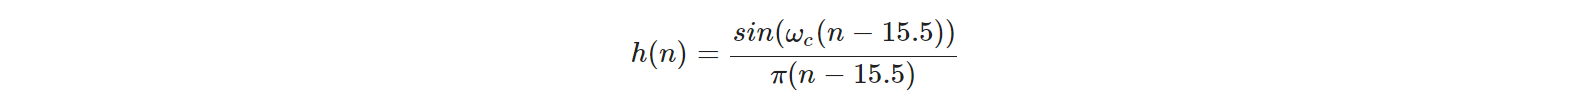

untuk $n=0,...,31,$

dan mengalikannya dengan jendela Kaiser kita.

Di iPython:

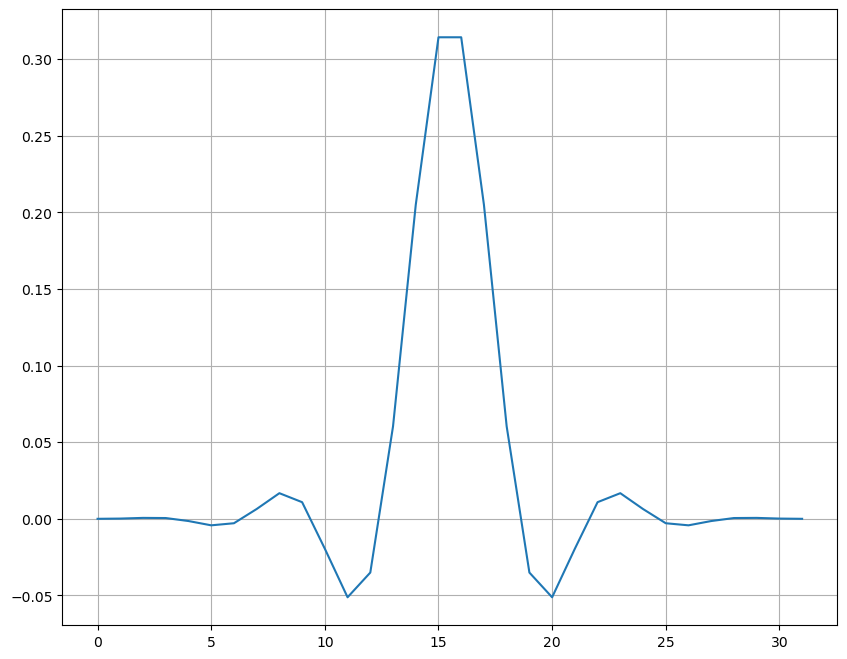

In [6]:
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8);
#multiply ideal filter and Kaiser window:
hfilt=hk*h;
plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Menghasilkan respon impuls berikut:

Respons frekuensinya adalah:

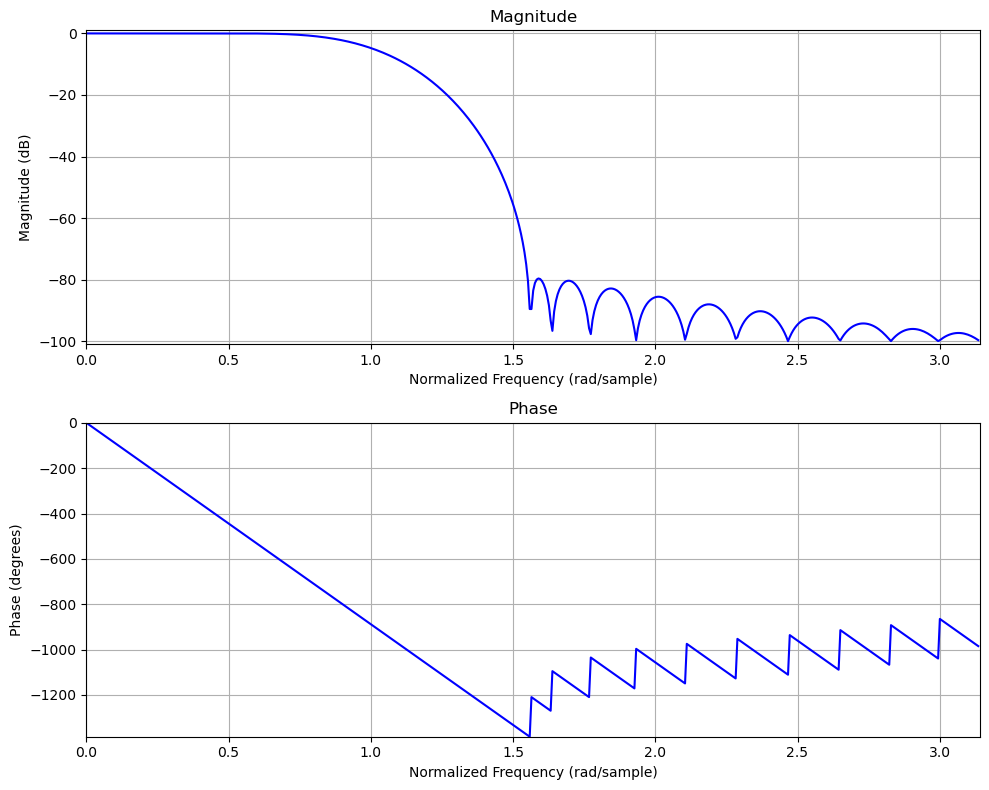

In [7]:
freqz(hfilt)

Sekarang kita bisa melihat bahwa stop band kita, yang dimulai dari 0,5, memang masih memiliki redaman yang cukup, sekitar -80 dB, dan jika kita ambil 3 dB sebagai batas untuk pita lulus kita, itu mencapai frekuensi terstandarisasi 0,3.

Kembali ke contoh downsampling kita, di mana kita downsampling dari laju sampel 44,1 kHz menjadi 22,05 kHz, frekuensi terstandarisasi 0,5 sesuai dengan 11 kHz, dan batas atas pita lulus kita adalah 0,3 atau 6,6 kHz. Ini sekarang terlihat seperti filter yang dapat digunakan untuk aplikasi kita!

Ini juga menunjukkan mengapa frekuensi yang dapat digunakan dalam representasi diskrit-waktu selalu jelas lebih rendah dari frekuensi Nyquist (kita membutuhkan filter, yang memiliki pita transisi).

## Cara Mendapatkan Modulasi High Pass atau Band Pass

### Pendekatan Pertama (Desain Filter Ideal)

Kita lagi-lagi mendesain sebuah filter ideal, kemudian mengaplikasikan jendelanya.

Misalnya, jika kita ingin mendapatkan high pass, kita dapat mulai dengan mendesain filter high pass ideal, menggunakan invers DTFT kita, yang memberikan respon impuls ganda tak terhingga, dari −∞ hingga +∞, lalu jendela respon impuls ideal ini untuk mendapatkan filter FIR. Untuk high pass ideal, kita dapat mendefinisikan respons frekuensi yang diinginkan $H_d(Ω)$ sebagai 1 pada frekuensi tinggi, di atas frekuensi cutoff $Ω_c$, dan 0 pada frekuensi rendah.

$$\large
H_d(\Omega) = \begin{cases}
        \begin{split}
            1         \text{ for } & \mid \Omega \mid >\Omega_c \\
              \text{0 else } & {} \\
         \end{split}
    \end{cases}
$$

Jika kita ingin memiliki respons impuls bernilai real, kita perlu membuat respons frekuensinya sedemikian rupa sehingga nilainya pada frekuensi negatif adalah kompleks konjugat dari nilai-nilai pada frekuensi positif. Cara termudah untuk melakukannya di sini adalah dengan membuat frekuensi negatif identik dengan frekuensi positif.

$H_d(\Omega)=\begin{cases}
        \begin{split}
            1               & \text{ for } & -\pi<\Omega<-\Omega_c \\
            0 & \text{ for } & -\Omega_c<\Omega<+\Omega_c \\
            1 & \text{ for } & \Omega_c <\Omega <\pi
        \end{split}
    \end{cases}
$

Sekarang kita bisa menerapkan invers DTFT, mencari solusi analitis, sama seperti dengan filter low pass, untuk mendapatkan respon impuls ideal, dan kemudian mengalikannya dengan sebuah jendela untuk mendapatkan filter FIR.

### Pendekatan Kedua (Modulasi)

Menggeser pita lulus (ideal) kami ke posisi yang diinginkan dalam domain frekuensi. Dengan cara ini, kita dapat mengubah low pass menjadi band pass atau high pass, tergantung pada di mana kita menggeser pita lulus kami (dengan cara ini kita dapat mengubah masalah baru menjadi masalah yang sudah kita kenal, yaitu desain filter lowpass). Bagaimana kita menggeser pita lulus kami dalam domain frekuensi? Kita mengonvolusinya dalam domain frekuensi dengan sebuah impuls Dirac pada frekuensi pusat yang diinginkan $Ω_0$.

$$H_d(\Omega) * \delta(\Omega - \Omega_0) = H_d(\Omega - \Omega_0)$$

Jika kita ingin memiliki respons impuls bernilai real, kita perlu mempertahankan simetri antara frekuensi positif dan negatif, dengan juga menggeser respons frekuensinya dengan jumlah yang sama ke frekuensi negatif.

$$H_d(\Omega) * (\delta(\Omega - \Omega_0) + \delta(\Omega + \Omega_0)) = H_d(\Omega - \Omega_0) + H_d(\Omega  \Omega_0))$$

Bagaimana ini mengubah respons impuls (ideal) kita? Untuk menjawabnya, kita menggunakan invers DTFT. Konvolusi dalam domain frekuensi menjadi perkalian dalam domain waktu. Sekarang kita hanya perlu invers DTFT dari (δ(Ω−Ω0)+δ(Ω+Ω0)), atau invers DTFT dari δ(Ω−Ω0). Untuk mendapatkannya, kita dapat dengan mudah menggunakan rumus invers DTFT kita.

$$\frac{1}{2\pi} \int_{-\pi}^{\pi} \delta(\Omega + \Omega_0) . e^{j \Omega . n} d \Omega = \frac{1}{2 \pi} e^{j . \Omega_0 . n}$$

Ingatlah, integrasi dari sebuah fungsi yang dikalikan dengan impuls Dirac adalah nilai fungsi pada posisi impuls Dirac (di sini: Ω0).

$$\int_{-\infty}^{\infty} \delta(\Omega - \Omega_0) H(\Omega) d \Omega = H(\Omega_0)$$

Sekarang kita bisa mendapatkan invers DTFT dari (δ(Ω−Ω0)+δ(Ω+Ω0)), yang sekarang

$$\frac{1}{2\pi} . (e^{j . \Omega_0 . n} + e^{-j . \Omega_0 . n}) = \frac{1}{\pi} cos(\Omega_0 . n)$$

Ini adalah fungsi yang perlu kita kalikan dengan filter low pass ideal kita, untuk mendapatkan filter ideal di mana pita lulusnya berpusat di sekitar Ω0. Kita sebut fungsi cos ini sebagai "fungsi modulasi", dan perkalian dengan fungsi ini sebagai "modulasi".

Perhatikan bahwa kita juga bisa memperkenalkan pergeseran fasa p ke dalam fungsi modulasi ini, misalnya mengubah fungsi cos menjadi fungsi sinus. Ini masih akan berfungsi, karena dalam domain frekuensi ini adalah perkalian dengan eksponensial kompleks lainnya dari istilah fasa dalam domain waktu, sama seperti dari keterlambatan waktu. Ini hanya akan memperkenalkan perubahan fasa dalam filter akhir.

### Contoh Python
Berikut dapat langsung diterapkan pada sinyal audio. Contoh ini mengambil sinyal dari mikrofon dan memodulasinya (mengalikannya) dengan fungsi sinus 500 Hz.

In [ ]:
"""
PyAudio Example: Mix speech with a 1 kHz carrier (i.e., record a
few samples, mix/modulate them with a sine wave, and play them back immediately).
Using block-wise processing 
Gerald Schuller, Octtober 2014

--- Modified by Renato Profeta to include GUI, April 2020
"""

# Imports
import pyaudio
import struct
import numpy
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox
import threading

# Parameters
CHUNK = 5000 #Blocksize
WIDTH = 2 #2 bytes per sample
CHANNELS = 1 #2
RATE = 32000  #Sampling Rate in Hz
RECORD_SECONDS = 8

def audio_app(toogle_run):
    while(True):
        if toggle_run.value==True:
            break
        
        #Reading from audio input stream into data with block length "CHUNK":
        data = (stream.read(CHUNK))
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK, data))
        samples=(list(shorts))

        #start block-wise signal processing:

        #Compute a block/an array of sine samples with 500 Hz:
        s=numpy.sin(2*numpy.pi/RATE*500*numpy.arange(0,CHUNK));
        #multiply/modulate the signal with the sine samples:
        samples=samples*s;
        samples=(numpy.clip(samples, -32000,32000)).astype(int)
        #end signal processing

        #converting from short integers to a stream of bytes in "data":
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream: 
        stream.write(data, CHUNK)

# GUI
toggle_run = ToggleButton(description='Stop')
button_start = Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
        toggle_run.disabled=True
toggle_run.observe(on_click_toggle_run, 'value')
        
box_buttons = HBox([button_start,toggle_run])

# Create a Thread for run_spectrogram function
thread = threading.Thread(target=audio_app, args=(toggle_run,))

# Start Audio Stream
# Create 
p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                #input_device_index=10,
                frames_per_buffer=CHUNK)
                
display(box_buttons)

Perhatikan: Suara dan suara manusia terdengar lebih tinggi, seperti suara Mickey Mouse, sebagai hasil dari pergeseran frekuensi!

Sebagai Kesimpulan: Kita dapat menggeser filter ideal kita dalam domain frekuensi dengan mengalikan respons impuls ideal (atau sudah dijendelakan) dengan fungsi modulasi.

$$\frac{1}{\pi} cos(\Omega_0 . (n - p))$$

di mana \( p \) adalah beberapa keterlambatan fase.

Ini diilustrasikan dalam gambar-gambar berikut. Pertama, spektrum asli low pass,

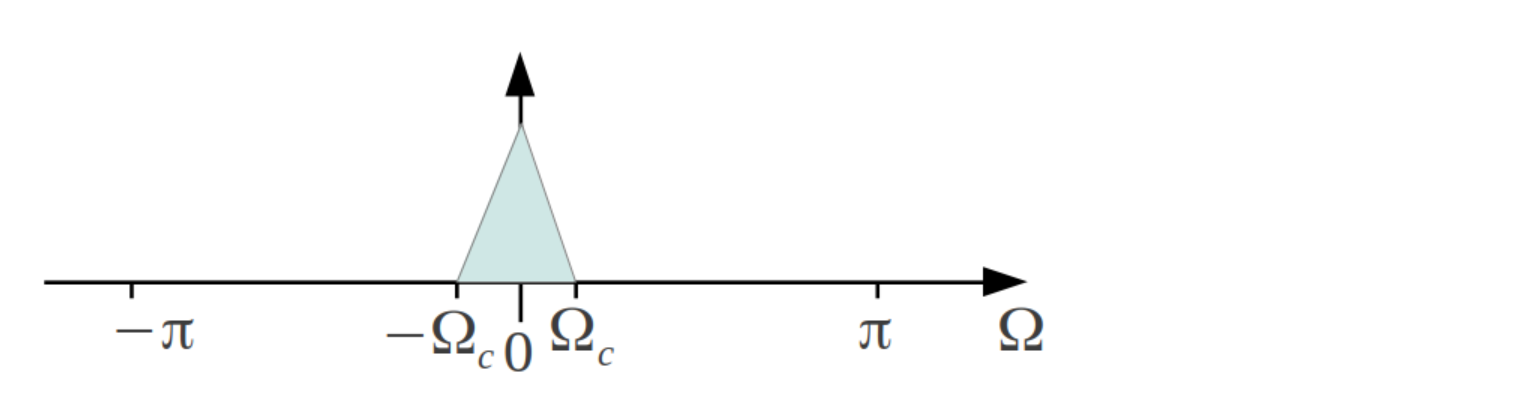

Selanjutnya, spektrum setelah modulasi dengan frekuensi \( \Omega_0 \)

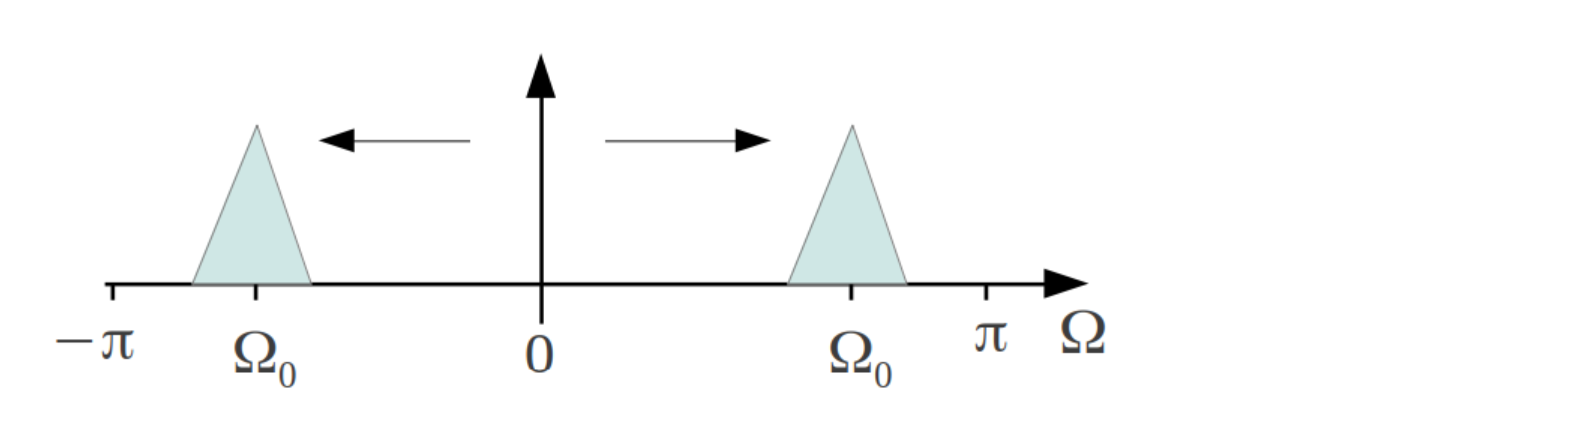

Contoh:

Untuk mendapatkan high pass, kita perlu menggeser pita lulus dari 0 hingga π, maka kita mendapatkan $Ω_0=π$, dan memilih p=0. Fungsi modulasi kemudian adalah 1/π⋅cos(π⋅n) yang hanya berupa urutan +/-1!

Misalnya untuk low pass kita:

In [13]:
import numpy as np
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8)
#multiply ideal filter and Kaiser window:
hfilt=hk*h

Kita bisa membuat high pass dari itu menggunakan modulasi:

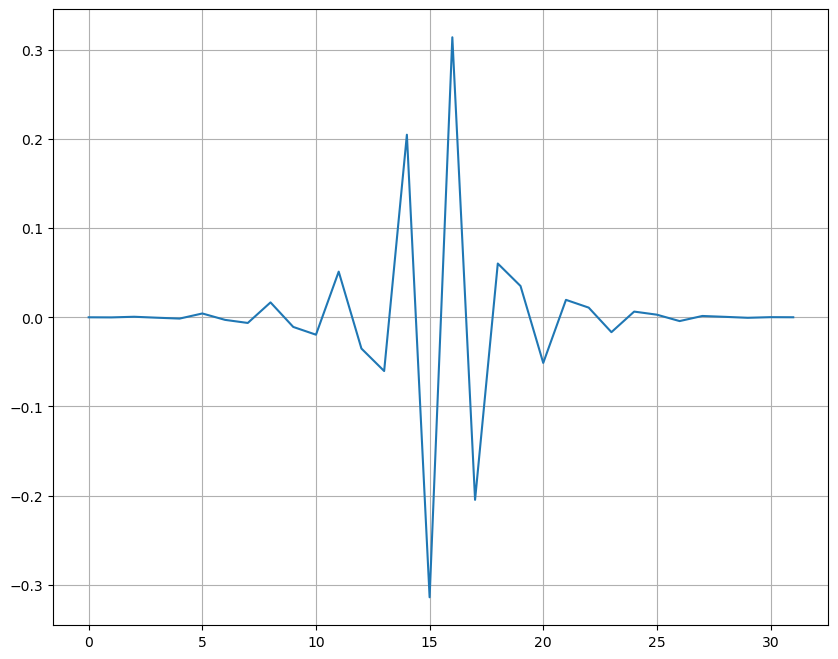

In [14]:
import matplotlib.pyplot as plt
hp=hfilt*np.cos(np.pi *np.arange(32))

plt.figure(figsize=(10,8))
plt.plot(hp)
plt.grid()

Di sini kita dapat melihat efek dari modulasi dengan urutan +/-1.

Respons frekuensi yang dihasilkan adalah:

Dan untuk respons frekuensi yang kita dapat:

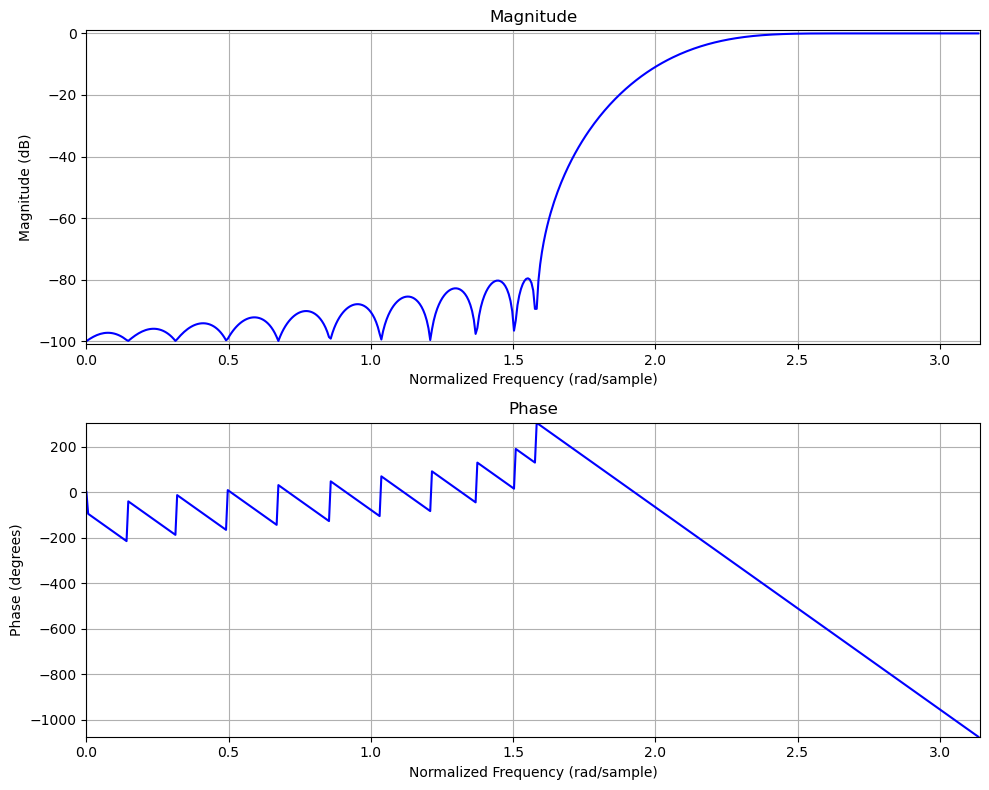

In [15]:
freqz(hp)

dan kita melihat bahwa kita memang mendapatkan high pass. Ini pada dasarnya terlihat terbalik di sekitar pusat. Ini benar-benar tergeser, tetapi apa yang kita lihat sebagai bagian high pass adalah bagian frekuensi negatif dari low pass kita.

Kita juga bisa mendapatkan band pass dengan frekuensi pusat $\frac{\pi}{2}$ dengan:

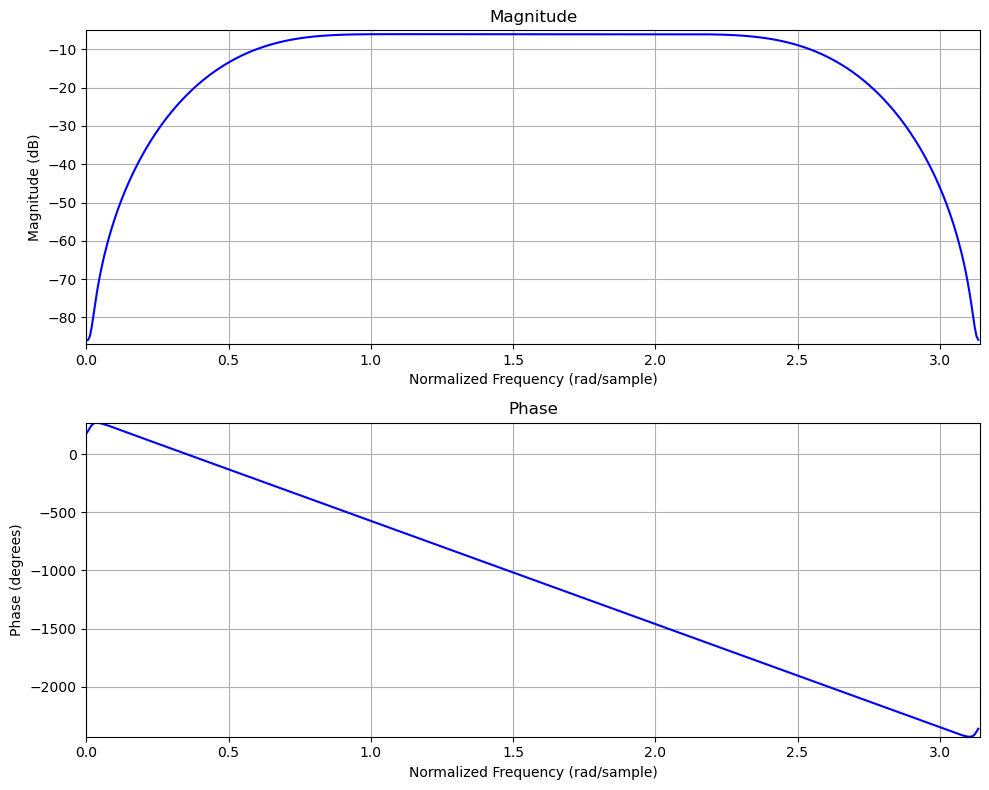

In [16]:
hbp=hfilt*np.cos(np.pi/2 *np.arange(32))
freqz(hbp)

Dan kita melihat bahwa kita memang mendapatkan band pass!

Perhatikan bahwa kita mendapatkan pita lulus dalam kasus band pass ini yang dua kali lebih lebar daripada dalam kasus low pass atau high pass, karena di sini frekuensi negatif dari kasus low atau high pass muncul sebagai setengah lain dari pita lulus.